In [0]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
imdb = keras.datasets.imdb

In [0]:
VOCAB_SIZE = 10000

In [0]:
INDEX_FROM = 3 #EDITED
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=VOCAB_SIZE,index_from=INDEX_FROM)

In [0]:
print('\n Sample label:', test_labels[1])


 Sample label: 1


In [0]:
print('Sample review:', train_data[0])

Sample review: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [0]:
from keras.preprocessing.sequence import pad_sequences
MAXIMUM_LENGTH = 500
preprocessed_train_data = pad_sequences(train_data,maxlen=MAXIMUM_LENGTH)
processed_test_data = pad_sequences(test_data,maxlen=MAXIMUM_LENGTH)

In [0]:
print('Length of sample train_data before preprocessing:', len(train_data[1]), type(train_data[1]))
print('Length of sample train_data after preprocessing:', len(preprocessed_train_data[0]), type(preprocessed_train_data[1]))

Length of sample train_data before preprocessing: 189 <class 'list'>
Length of sample train_data after preprocessing: 500 <class 'numpy.ndarray'>


In [0]:
model = Sequential()
EMBED_SIZE = 100
# model.add()
model.add(Embedding(VOCAB_SIZE,EMBED_SIZE,input_length=MAXIMUM_LENGTH))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(1,activation='sigmoid',input_shape=(1,)))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________
None


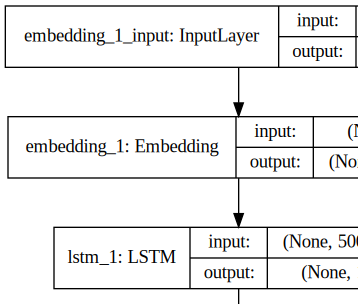

In [0]:
# from keras.utils import plot_mode
from IPython.display import SVG
from keras.utils import vis_utils
SVG(vis_utils.model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [0]:
history = model.fit(preprocessed_train_data,
                    train_labels,
                    epochs=3,
                    batch_size=512,
                    validation_split=0.08,
                    verbose=1)




Train on 23000 samples, validate on 2000 samples
Epoch 1/3





23000/23000 [==============================] - 44s 2ms/step - loss: 0.6694 - acc: 0.6613 - val_loss: 0.6239 - val_acc: 0.7195
Epoch 2/3
23000/23000 [==============================] - 43s 2ms/step - loss: 0.4548 - acc: 0.8093 - val_loss: 0.3876 - val_acc: 0.8395
Epoch 3/3
23000/23000 [==============================] - 43s 2ms/step - loss: 0.2847 - acc: 0.8890 - val_loss: 0.3232 - val_acc: 0.8750


In [0]:
results = model.evaluate(processed_test_data, test_labels)

25000/25000 [==============================] - 282s 11ms/step


In [0]:
print(results)
# loss, accuracay 

[0.3415896670007706, 0.86064]


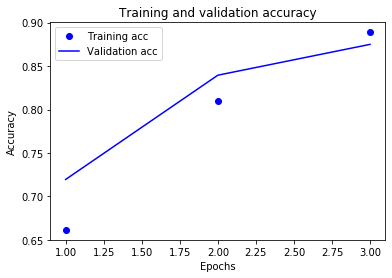

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
embed_layer = model.get_layer('embedding_1').get_weights()[0]

In [0]:
print('Shape of word_embeddings:', embed_layer.shape)

Shape of word_embeddings: (10000, 100)


In [0]:
word2idx = imdb.get_word_index()
word2idx = {k:(v+INDEX_FROM) for k,v in word2idx.items() if v < 9998}
word2idx["<PAD>"] = 0
word2idx["<START>"] = 1
word2idx["<UNK>"] = 2
word2idx["<OTH>"] = 3

In [0]:
idx2word = {v: k for k,v in word2idx.items()}
print(' '.join(idx2word[idx] for idx in train_data[0]))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

In [0]:
idx2word[4]

'the'

In [0]:
# view the corresponding data
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [0]:
import pandas as pd
pd.DataFrame(embed_layer, index=list(idx2word.values())).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
woods,0.041655,-0.004162,0.036416,-0.007769,0.016623,0.022054,0.026495,0.014764,0.036713,-0.009974,-0.001728,-0.021609,0.034813,-0.049870,-0.011548,-0.036677,0.016397,-0.005125,-0.018056,-0.049129,0.047824,0.046190,0.033937,0.039844,0.028316,0.039815,-0.028185,-0.044396,0.021601,0.011067,0.023245,0.000964,-0.024844,0.015299,-0.022730,-0.085381,-0.050432,-0.014188,0.026361,-0.034851,...,-0.017855,-0.027354,0.025516,-0.035381,0.039882,-0.050876,-0.013886,-0.017816,0.008162,-0.010261,-0.025404,-0.042995,0.025539,-0.027961,0.026688,0.015168,0.007497,0.010241,-0.013562,-0.039898,-0.011123,0.005600,0.021640,0.026836,-0.031714,-0.003157,-0.003340,0.020189,-0.029569,-0.009565,-0.034549,0.009877,-0.007378,0.049964,0.025319,0.042448,0.002942,-0.052202,-0.008577,0.025173
hanging,-0.082972,-0.016331,0.105816,-0.033665,0.091190,0.104275,0.079178,0.061903,0.009602,-0.069079,0.014809,0.011380,0.064047,-0.044347,0.099338,0.075399,0.073625,-0.088891,0.108794,-0.082586,0.089626,-0.100837,-0.074302,0.037501,0.071762,-0.046468,0.011749,0.046723,0.054461,0.012830,0.108793,-0.102824,-0.103073,0.074117,0.102274,-0.100209,-0.006605,-0.102692,0.098304,-0.029560,...,-0.086856,0.053244,-0.085389,-0.051728,0.063859,0.046240,0.060594,-0.078094,-0.061810,-0.085487,-0.055433,0.028659,-0.043460,-0.059477,0.016672,-0.024160,-0.105245,0.089619,-0.013868,0.092630,0.050470,-0.077958,0.040463,0.067583,0.089672,-0.096181,-0.095689,-0.021505,-0.028151,-0.075566,-0.050387,-0.085399,0.037631,-0.074461,0.105975,0.098305,0.059620,0.033133,0.102802,-0.060900
woody,0.013392,-0.020555,-0.027443,0.027033,0.020650,-0.026620,-0.027263,-0.010436,-0.037825,0.014783,0.011266,0.011168,0.027373,-0.040281,-0.030182,0.001671,-0.036832,0.017497,-0.030775,-0.036609,-0.033408,0.011125,-0.029316,-0.040488,0.005400,0.049605,-0.016306,0.002617,0.016905,0.000711,-0.026655,-0.016161,0.022682,-0.026333,-0.021972,0.001108,-0.022658,-0.031877,-0.040647,-0.045587,...,0.043409,0.036542,0.016200,0.047142,0.038302,0.013677,0.031543,0.003324,-0.000153,0.015907,-0.015930,0.027380,0.007782,0.044739,-0.038391,0.026142,-0.026112,0.043953,-0.014712,0.025748,-0.007161,-0.010433,0.001630,0.031250,0.017887,0.047298,0.044818,-0.022556,0.055360,-0.029445,0.035271,-0.032640,0.001784,0.018452,-0.022201,0.019902,0.033573,-0.017589,-0.002092,-0.028191
arranged,0.018465,-0.046400,0.009407,-0.014207,-0.030123,0.031651,-0.014168,-0.024966,-0.021764,-0.037386,0.041274,-0.038032,0.004103,0.012300,-0.026567,-0.030294,0.010808,0.039688,-0.001576,-0.003757,0.046705,-0.002704,0.043823,0.040227,0.004956,0.003929,0.034458,-0.014105,0.012851,0.006164,0.005541,-0.042642,-0.012594,-0.013629,-0.027612,-0.037255,0.005652,0.034876,0.008897,-0.018437,...,0.028284,-0.010055,0.021464,-0.016378,-0.040229,0.037360,0.021523,0.033909,-0.020097,0.017273,0.034670,0.029690,0.048957,-0.003559,-0.049837,-0.020058,0.015046,0.011103,0.027600,-0.046230,0.033411,0.005548,-0.035584,-0.019439,-0.016700,-0.038198,-0.017340,-0.011759,0.010563,-0.020919,-0.029012,-0.038450,-0.033515,-0.021435,0.000384,-0.049744,0.004906,0.022047,0.036068,0.035959
bringing,0.042764,-0.046972,0.043886,-0.009221,-0.003381,0.020080,0.028148,0.041053,-0.024189,-0.008084,0.015990,-0.021423,0.015610,0.043142,-0.019883,-0.028176,0.032054,0.026647,-0.025404,-0.051763,0.044162,0.028525,-0.029989,0.035850,-0.011633,0.013341,0.047613,-0.002112,0.045146,-0.039808,-0.000357,-0.019349,0.015426,-0.018508,-0.045124,0.061393,0.015446,-0.004710,0.023161,0.002690,...,-0.026265,-0.016059,-0.008884,-0.047515,-0.008549,0.010963,0.041121,0.032719,-0.003078,0.025419,-0.038278,0.009944,-0.021587,-0.031465,-0.016280,-0.020746,0.008240,-0.002531,0.020164,-0.010524,0.031918,0.002738,0.002379,0.050366,-0.031625,0.027252,0.035007,-0.013026,0.013576,-0.009910,-0.048

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(embed_layer)

In [0]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

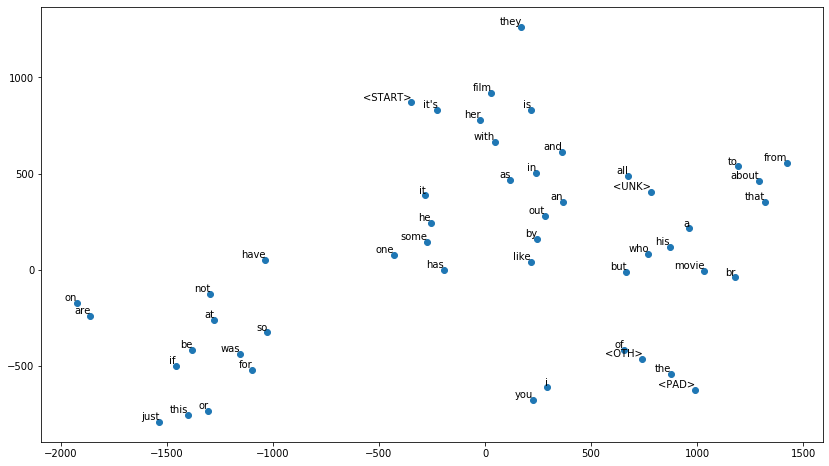

In [0]:
tsne = TSNE(perplexity=3, n_components=2, init='pca', n_iter=5000, method='exact')
np.set_printoptions(suppress=True)
plot_only = 50
T = tsne.fit_transform(embed_layer[:plot_only, :])
labels = [idx2word[i] for i in range(plot_only)]
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1])

for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', ha='right', va='bottom')

In [0]:
# 1. Create a new model that is a copy of the model step 3.  
# 2. To this new model, add two dropoutlayers, one between the embedding layer and the LSTM layer and another between the LSTM layer and the output layer. 
# 3. Repeat steps 4 and 5 for this model.  What do you observe?How about if you train this new model for 6 epochs instead?
# 4.Experiment with compiling the model with batch sizes of 1, 32, len(training_data). What doyou observe?

In [0]:
model2 = Sequential()
EMBED_SIZE = 100
# model.add()
model2.add(Embedding(VOCAB_SIZE,EMBED_SIZE,input_length=MAXIMUM_LENGTH))
model2.add(Dropout(0.2))
model2.add(LSTM(100, activation='tanh'))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation='sigmoid',input_shape=(1,)))
print(model2.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 500, 100)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
history = model2.fit(preprocessed_train_data,
                    train_labels,
                    epochs=6,
                    batch_size=512,
                    validation_split=0.08,
                    verbose=1)

Train on 23000 samples, validate on 2000 samples
Epoch 1/6
23000/23000 [==============================] - 45s 2ms/step - loss: 0.6629 - acc: 0.6537 - val_loss: 0.6134 - val_acc: 0.7200
Epoch 2/6
23000/23000 [==============================] - 44s 2ms/step - loss: 0.4564 - acc: 0.8085 - val_loss: 0.3700 - val_acc: 0.8425
Epoch 3/6
23000/23000 [==============================] - 44s 2ms/step - loss: 0.2848 - acc: 0.8855 - val_loss: 0.3410 - val_acc: 0.8585
Epoch 4/6
23000/23000 [==============================] - 44s 2ms/step - loss: 0.2040 - acc: 0.9239 - val_loss: 0.3259 - val_acc: 0.8795
Epoch 5/6
23000/23000 [==============================] - 43s 2ms/step - loss: 0.1625 - acc: 0.9443 - val_loss: 0.3318 - val_acc: 0.8765
Epoch 6/6
23000/23000 [==============================] - 44s 2ms/step - loss: 0.1274 - acc: 0.9581 - val_loss: 0.3510 - val_acc: 0.8705


In [0]:
results = model2.evaluate(processed_test_data, test_labels)
print(results)

25000/25000 [==============================] - 294s 12ms/step
[0.3607836242961884, 0.86712]


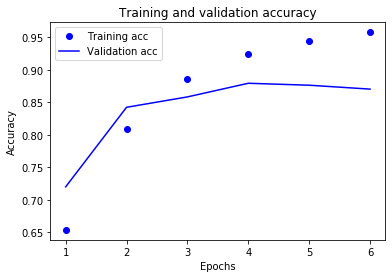

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
# model3 = Sequential()
# EMBED_SIZE = 100
# # model.add()
# model3.add(Embedding(VOCAB_SIZE,EMBED_SIZE,input_length=MAXIMUM_LENGTH))
# model3.add(Dropout(0.2))
# model3.add(Bidirectional(100, activation='tanh'))
# model3.add(Dropout(0.2))
# model3.add(Dense(1,activation='sigmoid',input_shape=(1,)))
# print(model.summary())

In [0]:
# model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
# history = model3.fit(preprocessed_train_data,
#                     train_labels,
#                     epochs=3,
#                     batch_size=512,
#                     validation_split=0.08,
#                     verbose=1)

Train on 23000 samples, validate on 2000 samples
Epoch 1/3
23000/23000 [==============================] - 45s 2ms/step - loss: 0.6674 - acc: 0.6229 - val_loss: 0.6370 - val_acc: 0.7125
Epoch 2/3
23000/23000 [==============================] - 44s 2ms/step - loss: 0.5044 - acc: 0.7959 - val_loss: 0.3744 - val_acc: 0.8420
Epoch 3/3
 2560/23000 [==>...........................] - ETA: 37s - loss: 0.3246 - acc: 0.8691

In [0]:
# import matplotlib.pyplot as plt

# history_dict = history.history

# acc = history_dict['acc']
# val_acc = history_dict['val_acc']
# loss = history_dict['loss']
# val_loss = history_dict['val_loss']

# epochs = range(1, len(acc) + 1)

# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.show()